In [2]:
conn = sql.connect("database.sqlite")
conn

In [3]:
def sql_query(q):
    return pd.read_sql_query(q, conn)

In [4]:
# Show jobtitle where overtimepay > 50k and excluded 'not provided' rows

q = "select jobtitle, overtimepay from salaries where overtimepay > 50000 and overtimepay != 'Not Provided'"

sql_query(q)

,JobTitle,OvertimePay
0,CAPTAIN III (POLICE DEPARTMENT),245131.88
1,CAPTAIN III (POLICE DEPARTMENT),106088.18
2,WIRE ROPE CABLE MAINTENANCE MECHANIC,56120.71
3,"BATTALION CHIEF, (FIRE DEPARTMENT)",89062.90
4,"BATTALION CHIEF, (FIRE DEPARTMENT)",86362.68
...,...,...
2160,Transit Operator,51625.42
2161,Transit Operator,52550.53
2162,Track Maintenance Worker,50265.23
2163,Diagnostic Imaging Tech I,74935.96


In [5]:
# Show All Employees With A Total Pay Between 50,000 and 75,000

q = '''select employeename, totalpay from salaries
    where totalpay > 50000 and totalpay < 75000
    '''
sql_query(q)

,EmployeeName,TotalPay
0,MAMIKO NAKAMURA,74999.62
1,HEDLEY PRINCE,74998.73
2,LINDA BARNARD,74998.30
3,ANGELA WHITTAKER,74997.84
4,JANE CHU,74997.81
...,...,...
33552,Stephanie Reidy,51785.23
33553,Maria Theresa Luna,52266.82
33554,Paul E Maltzer,51673.98
33555,Kevin I Dolar,50953.19


In [6]:
# Show All Employees With A Total Pay Between 50,000 and 75,000

q = '''select employeename, totalpay from salaries
    where totalpay between 50000 and 75000
    '''
sql_query(q)

,EmployeeName,TotalPay
0,MAMIKO NAKAMURA,74999.62
1,HEDLEY PRINCE,74998.73
2,LINDA BARNARD,74998.30
3,ANGELA WHITTAKER,74997.84
4,JANE CHU,74997.81
...,...,...
33552,Stephanie Reidy,51785.23
33553,Maria Theresa Luna,52266.82
33554,Paul E Maltzer,51673.98
33555,Kevin I Dolar,50953.19


In [42]:
# Between is a keyword used in sql.

In [7]:
# Show All Employees With A BasePay less than 50,000 Or A TotalPay Greater Than 100,000

q = '''select employeename, basepay, totalpay from salaries
    where basepay < 50000
    or 
    totalpay > 100000
    order by 3 desc
    limit 10'''

sql_query(q)

,EmployeeName,BasePay,TotalPay
0,NATHANIEL FORD,167411.18,567595.43
1,GARY JIMENEZ,155966.02,538909.28
2,David Shinn,129150.01,471952.64
3,Amy P Hart,318835.49,390111.98
4,Gary Altenberg,128808.87,362844.66
5,John Goldberg,104404.00,350403.41
6,Samson Lai,186236.42,347102.32
7,Ellen G Moffatt,270222.04,344187.46
8,William J Coaker Jr.,257340.00,339653.70
9,Gregory P Suhr,319275.01,339282.07


## Aggregate Functions.

In [43]:
# Provides one value/single output (i.e: sum,min,max,avg etc)

In [8]:
q = "select count(*) from salaries where jobtitle = 'CAPTAIN III (POLICE DEPARTMENT)'"
sql_query(q)

,count(*)
0,37


In [9]:
q = "select count(jobtitle) from salaries where jobtitle = 'CAPTAIN III (POLICE DEPARTMENT)'"
sql_query(q)

,count(jobtitle)
0,37


In [10]:
q = "select count(jobtitle) Captain_Count from salaries where jobtitle = 'CAPTAIN III (POLICE DEPARTMENT)'"
sql_query(q)

,Captain_Count
0,37


In [11]:
#average
q = "select avg(totalpay) 'Average TP of Custodian' from salaries where jobtitle = 'Custodian'"
sql_query(q)

,Average TP of Custodian
0,47070.542419


In [13]:
#max

q = "select max(totalpay) from salaries"
sql_query(q)

,max(totalpay)
0,567595.43


In [12]:
#max 

q = "select max(totalpay), employeename from Salaries"
sql_query(q)

,max(totalpay),EmployeeName
0,567595.43,NATHANIEL FORD


In [44]:
q = "select min(totalpay), employeename, jobtitle from salaries"
sql_query(q)

,min(totalpay),EmployeeName,JobTitle
0,-618.13,Joe Lopez,"Counselor, Log Cabin Ranch"


In [15]:
# How many employees in the salaries table have OvertimePay equal to 0?

q = "select count(employeename) from salaries where overtimepay = '0'"
sql_query(q)

,count(employeename)
0,77321


In [17]:
q = "select * from salaries where overtimepay = '0'"
sql_query(q)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0,51322.50,,307899.46,307899.46,2011,,San Francisco,
2,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262,0,17115.73,,302377.73,302377.73,2011,,San Francisco,
3,13,EDWARD HARRINGTON,EXECUTIVE CONTRACT EMPLOYEE,294580.02,0,0.00,,294580.02,294580.02,2011,,San Francisco,
4,14,JOHN MARTIN,DEPARTMENT HEAD V,271329.03,0,21342.59,,292671.62,292671.62,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77316,148646,Carolyn A Wilson,Human Services Technician,0,0,0.00,0,0.00,0.00,2014,,San Francisco,PT
77317,148648,Joann Anderson,Communications Dispatcher 2,0,0,0.00,0,0.00,0.00,2014,,San Francisco,PT
77318,148649,Leon Walker,Custodian,0,0,0.00,0,0.00,0.00,2014,,San Francisco,PT
77319,148650,Roy I Tillery,Custodian,0,0,0.00,0,0.00,0.00,2014,,San Francisco,PT


In [18]:
q = "select count(*) from salaries where overtimepay = '0'"
sql_query(q)

,count(*)
0,77321


In [19]:
q = '''select * from salaries where jobtitle = 'CAPTAIN III (POLICE DEPARTMENT)'
'''
sql_query(q)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
1,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,,335279.91,335279.91,2011,,San Francisco,
2,12,PATRICIA JACKSON,CAPTAIN III (POLICE DEPARTMENT),99722.00,87082.62,110804.30,,297608.92,297608.92,2011,,San Francisco,
3,62,ANNA BROWN,CAPTAIN III (POLICE DEPARTMENT),102571.24,7437.00,128543.64,,238551.88,238551.88,2011,,San Francisco,
4,66,RICHARD PARRY,CAPTAIN III (POLICE DEPARTMENT),185369.69,37873.61,14465.53,,237708.83,237708.83,2011,,San Francisco,
5,92,DONNA MEIXNER,CAPTAIN III (POLICE DEPARTMENT),102722.40,7437.00,118456.21,,228615.61,228615.61,2011,,San Francisco,
6,94,JOHN MURPHY,CAPTAIN III (POLICE DEPARTMENT),215914.03,0.00,12293.83,,228207.86,228207.86,2011,,San Francisco,
7,126,SHARON FERRIGNO,CAPTAIN III (POLICE DEPARTMENT),185369.68,27321.83,4651.44,,217342.95,217342.95,2011,,San Francisco,
8,212,CROCE CASCIATO,CAPTAIN III (POLICE DEPARTMENT),188341.62,0.00,16206.24,,204547.86,204547.86,2011,,San Francisco,
9,215,JOHN FEENEY,CAPTAIN III (POLICE DEPARTMENT),188348.55,5720.22,10173.43,,204242.20,204242.20,2011,,San Francisco,


In [20]:
q = '''select sum(overtimepay) from salaries where jobtitle = 'CAPTAIN III (POLICE DEPARTMENT)'
'''
sql_query(q)

,sum(overtimepay)
0,587353.74


## GROUP BY --- HAVING

GROUP BY works after the WHERE clause filters the rows and before the HAVING clause filters the groups.

In [45]:
# We usually make a group of duplicate data.
# There is no group of continous data(numeric,floating data bcz it changes continously)

In [28]:
#Count Employees by JobTitle

q = "select count(employeename) 'Count of Employee', jobtitle from salaries group by 2"
sql_query(q)

,Count of Employee,JobTitle
0,83,ACCOUNT CLERK
1,5,ACCOUNTANT
2,48,ACCOUNTANT INTERN
3,1,"ACPO,JuvP, Juv Prob (SFERS)"
4,1,ACUPUNCTURIST
...,...,...
2154,26,X-RAY LABORATORY AIDE
2155,100,X-Ray Laboratory Aide
2156,1,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS"
2157,4,Youth Comm Advisor


In [31]:
# Average TotalPay by JobTitle

q = '''select jobtitle, avg(totalpay) as AverageOfTotalPay from salaries
group by jobtitle
'''
sql_query(q)

,JobTitle,AverageOfTotalPay
0,ACCOUNT CLERK,44035.664337
1,ACCOUNTANT,47429.268000
2,ACCOUNTANT INTERN,29031.742917
3,"ACPO,JuvP, Juv Prob (SFERS)",62290.780000
4,ACUPUNCTURIST,67594.400000
...,...,...
2154,X-RAY LABORATORY AIDE,52705.880385
2155,X-Ray Laboratory Aide,50823.942700
2156,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",53632.870000
2157,Youth Comm Advisor,41414.307500


In [32]:
# Average TotalPay by JobTitle

q = '''select jobtitle, avg(totalpay) as AverageOfTotalPay from salaries
group by 1
order by 2 desc
limit 10
'''

sql_query(q)

,JobTitle,AverageOfTotalPay
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000
1,Chief Investment Officer,339653.700000
2,Chief of Police,329183.646667
3,"Chief, Fire Department",325971.683333
4,DEPUTY DIRECTOR OF INVESTMENTS,307899.460000
5,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",302377.730000
6,"Gen Mgr, Public Trnsp Dept",297769.413333
7,Asst Chf of Dept (Fire Dept),281763.483889
8,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",279359.560000
9,"Dep Dir for Investments, Ret",278592.545000


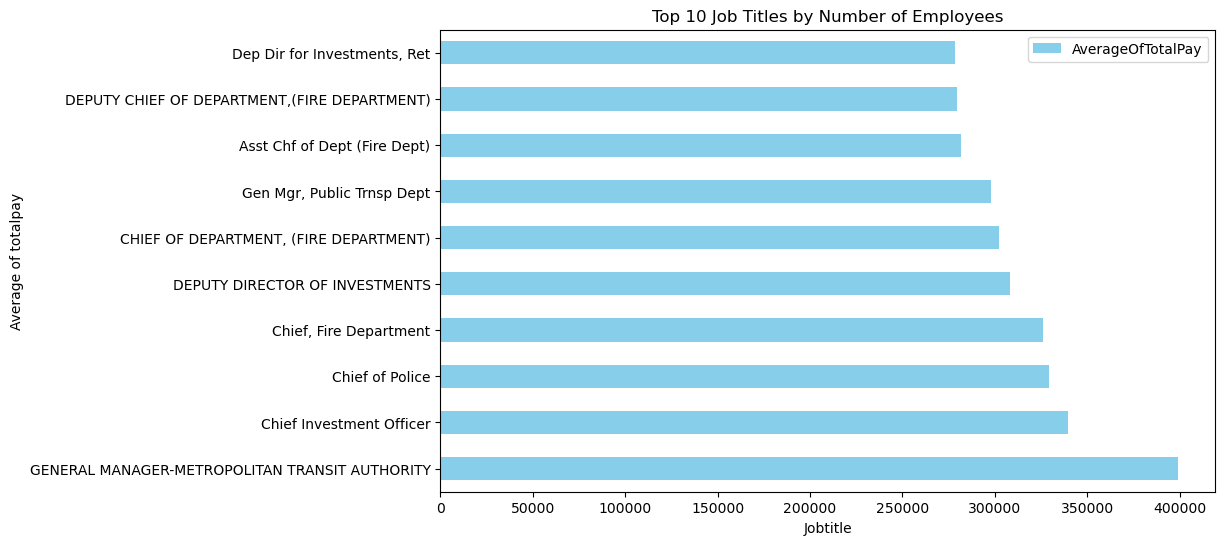

In [33]:
a = pd.read_sql_query(q, conn)
a.plot(kind='barh', x='JobTitle', y='AverageOfTotalPay', color='skyblue', figsize=(10, 6))

plt.xlabel('Jobtitle')
plt.ylabel('Average of totalpay')
plt.title('Top 10 Job Titles by Number of Employees')

plt.show()

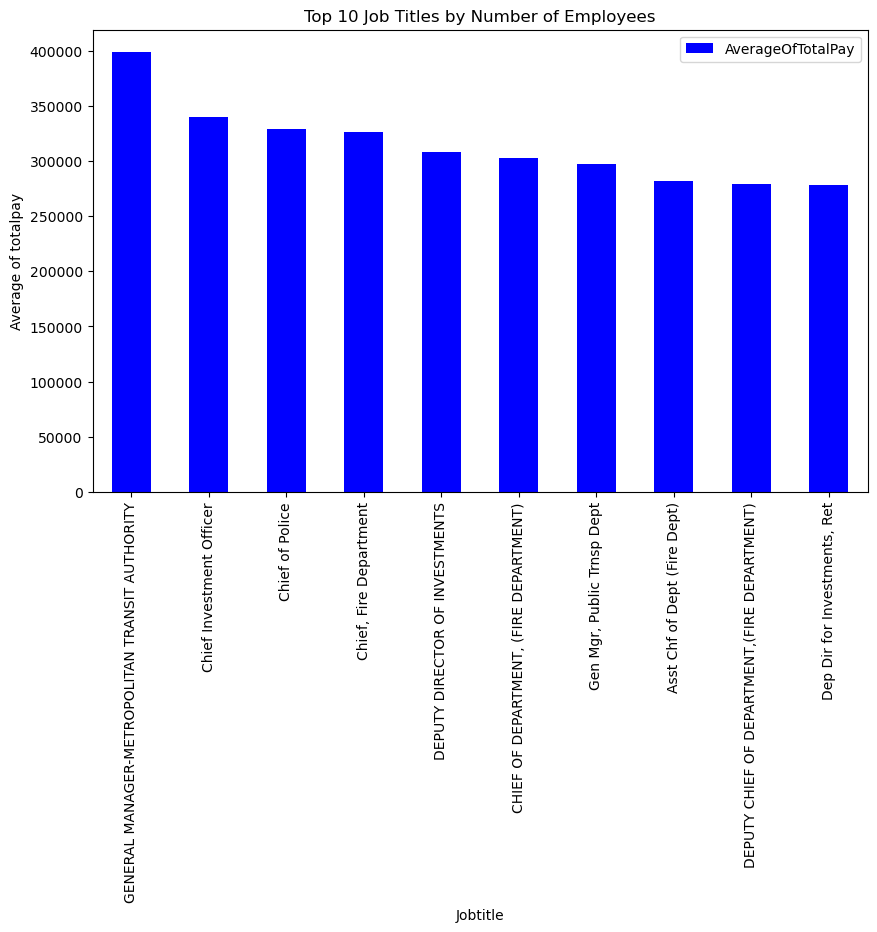

In [34]:
a = pd.read_sql_query(q, conn)
a.plot(kind='bar', x='JobTitle', y='AverageOfTotalPay', color='blue', figsize=(10, 6))

plt.xlabel('Jobtitle')
plt.ylabel('Average of totalpay')
plt.title('Top 10 Job Titles by Number of Employees')

plt.show()

In [35]:
# Employees with TotalPay Greater Than 100,000 by JobTitle

q = '''select count(employeename) 'count of employeename', jobtitle, totalpay from salaries
    group by 2
    having totalpay > 100000
    '''

sql_query(q)

,count of employeename,JobTitle,TotalPay
0,10,ADMINISTRATIVE ENGINEER,149322.23
1,1,"ADMINISTRATOR, SFGH MEDICAL CENTER",257124.44
2,27,AIRPORT COMMUNICATIONS OPERATOR,106776.25
3,13,AIRPORT ECONOMIC PLANNER,111811.72
4,17,AIRPORT ELECTRICIAN,118617.32
...,...,...,...
941,82,Water Service Inspector,122666.75
942,38,Welder,132307.93
943,30,Wire Rope Cable Maint Mechanic,174293.82
944,3,Wire Rope Cable Maint Sprv,224833.47


In [38]:
q = '''select count(employeename) 'count of employeename', jobtitle, totalpay from salaries
    having totalpay > 100000
    group by 2
    '''

sql_query(q)

DatabaseError: Execution failed on sql 'select count(employeename) 'count of employeename', jobtitle, totalpay from salaries
    having totalpay > 100000
    group by 2
    ': near "group": syntax error

In [47]:
# if condition is to put before grouping use "where" if afterwards use "having"! Otherwise error occurs.

In [39]:
q = '''select count(employeename) 'count of employeename', jobtitle, totalpay from salaries
    where totalpay > 100000
    group by 2
    '''

sql_query(q)

,count of employeename,JobTitle,TotalPay
0,9,ADMINISTRATIVE ENGINEER,149322.23
1,1,"ADMINISTRATOR, SFGH MEDICAL CENTER",257124.44
2,3,AIRPORT COMMUNICATIONS OPERATOR,106776.25
3,13,AIRPORT ECONOMIC PLANNER,111811.72
4,14,AIRPORT ELECTRICIAN,118617.32
...,...,...,...
1055,14,Welder,132307.93
1056,20,Wire Rope Cable Maint Mechanic,174293.82
1057,3,Wire Rope Cable Maint Sprv,224833.47
1058,4,Worker's Comp Supervisor 1,101722.05


In [40]:
# Employees with Average BasePay Greater Than 50,000 by JobTitle

q = '''select avg(basepay), jobtitle, employeename from salaries
    group by 2'''

sql_query(q)

,avg(basepay),JobTitle,EmployeeName
0,43300.806506,ACCOUNT CLERK,NAPOLEON VIRAY
1,46643.172000,ACCOUNTANT,CARLITO NEPACENA
2,28732.663958,ACCOUNTANT INTERN,PENG HUANG
3,62290.780000,"ACPO,JuvP, Juv Prob (SFERS)",Palminder K Hernandez
4,66374.400000,ACUPUNCTURIST,WEN XU
...,...,...,...
2154,47664.773077,X-RAY LABORATORY AIDE,DELBERT LEE
2155,46086.387100,X-Ray Laboratory Aide,Delbert Lee
2156,52609.910000,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",MARIO YEDIDIA
2157,39077.957500,Youth Comm Advisor,Mario Yedidia


In [41]:
# Employees with Average BasePay Greater Than 50,000 by JobTitle

q = '''select avg(basepay), jobtitle from salaries
    group by 2
    having avg(basepay) > 50000'''

sql_query(q)

,avg(basepay),JobTitle
0,62290.780000,"ACPO,JuvP, Juv Prob (SFERS)"
1,66374.400000,ACUPUNCTURIST
2,63435.628602,ADMINISTRATIVE ANALYST
3,59373.710000,ADMINISTRATIVE ANALYST II
4,92698.515000,ADMINISTRATIVE ANALYST III
...,...,...
1721,61475.267333,Wire Rope Cable Maint Mechanic
1722,92751.746667,Wire Rope Cable Maint Sprv
1723,68867.296429,Worker's Comp Supervisor 1
1724,72363.278784,Worker's Compensation Adjuster
